In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Import pandas and set the panda so it display all columns

In [73]:
import pandas as pd 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensure no wrapping based on width
pd.set_option('display.max_colwidth', None)

Preparing the data

In [74]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_id = df_test['Id']

In [75]:
dropc = ['Id']
df_train = df_train.drop(dropc,axis=1)
df_test = df_test.drop(dropc,axis=1)

In [76]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Filling the data

In [77]:
from sklearn.impute import SimpleImputer
#Categorical Imputer
Categorical_impute = SimpleImputer(fill_value ='NA' , strategy ='constant') 
categorical_colss = df_train.select_dtypes(include=['object']).columns

#Filling it 
categorical_colss_na = [col for col in categorical_colss if df_train[col].isna().any()]
df_train[categorical_colss_na] = Categorical_impute.fit_transform(df_train[categorical_colss_na])


In [78]:
categorical_colss_test = df_test.select_dtypes(include=['object']).columns

categorical_colss_na_test = [col for col in categorical_colss_test if df_test[col].isna().any()]
df_test[categorical_colss_na_test] = Categorical_impute.fit_transform(df_test[categorical_colss_na_test])

In [79]:
Numerical_impute = SimpleImputer(strategy ='mean') 
numerical_cols = df_train.select_dtypes(include=['int64','float64']).columns

#Filling it 
numerical_colss_na = [col for col in numerical_cols if df_train[col].isna().any()]
df_train[numerical_colss_na] = Numerical_impute.fit_transform(df_train[numerical_colss_na])

In [80]:
numerical_cols_test = df_test.select_dtypes(include=['int64','float64']).columns
numerical_colss_na_test = [col for col in numerical_cols_test if df_test[col].isna().any()]
df_test[numerical_colss_na_test] = Numerical_impute.fit_transform(df_test[numerical_colss_na_test])

Using label encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train[categorical_colss] = df_train[categorical_colss].apply(lambda col: LabelEncoder().fit_transform(col))
df_test[categorical_colss_test] = df_test[categorical_colss_test].apply(lambda col: LabelEncoder().fit_transform(col))

Remove outlier

In [84]:
df_train = df_train[df_train['SalePrice'] <= 500000]

In [85]:
#df_train['SalePrice_log'] = np.log1p(df_train['SalePrice'])

Visualise the saleprice 

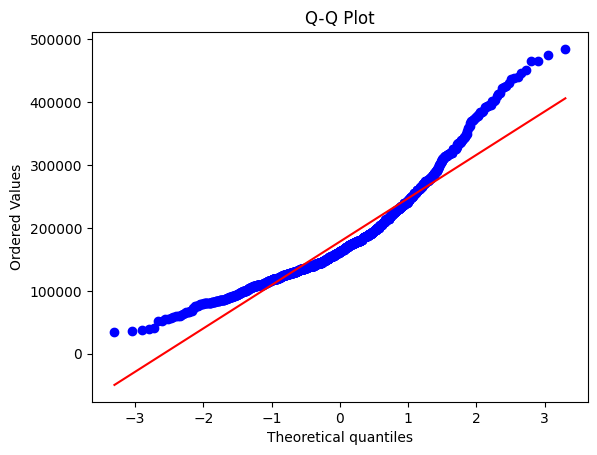

In [89]:
import matplotlib.pyplot as plt
from scipy import stats

# Example Data (Replace with your data)
data = df_train.SalePrice # Normally distributed data

# Generate Q-Q plot
stats.probplot(data, dist="norm", plot=plt)

# Show the plot
plt.title('Q-Q Plot')
plt.show()

preparing data for modeling

In [90]:
#train_drop = ['SalePrice_log','SalePrice']
X = df_train.drop('SalePrice',axis=1)
y = df_train.SalePrice
X_test = df_test

using xgboost because i have skill issue

In [93]:
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    min_child_weight=3,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0.01,
    objective='reg:squarederror',
    random_state=42
)


In [94]:
model.fit(X,y)

XGBRegressor(alpha=0.01, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [95]:
haia = model.predict(X_test)

In [96]:
#haia = np.expm1(haia_root) 

In [97]:
result = pd.DataFrame ({'Id' : test_id, 'SalePrice': cat_preds})

In [98]:
result.to_csv('Sub.csv',index=False)